### Default Payment predictions of cleint creitcard using python

####  About Default Payment 

A diabetes is a non-communicable but chronic disease which occure whenever the pancreas in longer able to produce insulin in blood or when the body can't make good use of the insulin it produces.

#### Problem of the Statement

The objective of this developing module is to predict wheter patient has diabetes or not. The datasets consiste of serveral medical predicator (Independent) variable and one target variable, Outcome. Peridicator variables includes pregnancies, Gulcose, Blood pressure, Skin thickness, Onsulin, BMI, DiabetesPedigreeFunction, age & Outcomes.

#### Descriptions

The aim of this datasets is to predict whether patient has diabete disease or not. The data sets has several medical parameter or predictor variable and core target variable. pridicator variables includes pregnancies, Glucose, Blood Pressure, Skin thockmess, Insulin, BMI, DiabetesPdigreeFunction, age & Outcomes.

##### For prediction we require dataset, here we have datasets which is downloded from UCI Machine Learning Dataset 

Datasets Link = https://archive.ics.uci.edu/static/public/350/default+of+credit+card+clients.zip

#### Step1:  Install All Required Python Package 

In [230]:
import os
import zipfile
import requests
#numpy 
import numpy as np
#pandas 
import pandas as pd
#matplotlib
import matplotlib.pyplot as plt
#seaborn 
import seaborn as sns

#### Step-2: Download datasets using Url 

In [231]:

# Link to Download the dataset
url ='https://archive.ics.uci.edu/static/public/350/default+of+credit+card+clients.zip'
dataset_zip = "default_of_credit_card_clients.zip"

# Download the zip file
response = requests.get(url)
with open(dataset_zip, "wb") as file:
    file.write(response.content)

# 2. Extract the dataset
with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall("default_of_credit_card_clients")


In [232]:
extract_folder = "default_of_credit_card_clients/default of credit card clients.xls"
print(extract_folder)

default_of_credit_card_clients/default of credit card clients.xls


In [233]:
#Code to covnvet excel files into CSV files 
# Path to the XLS file
xls_file = "default_of_credit_card_clients/default of credit card clients.xls"
# Load the XLS file into a DataFrame
df = pd.read_excel(xls_file, header=1)  # Skip the first row with general info
# Specify the output CSV file path
csv_file = "default_of_credit_card_clients/default_of_credit_card_clients.csv"
# Save the DataFrame to CSV
df.to_csv(csv_file, index=False)
#loading 
data = pd.read_csv('default_of_credit_card_clients/default_of_credit_card_clients.csv')

#### Step-3 Exploratory Data analysis 

In [234]:
data.head(n=7)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0


In [235]:
data.shape

(30000, 25)

In [236]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [237]:
data.tail(n=5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [238]:
print("Checking Missing values :\n", data.isnull().sum())

Checking Missing values :
 ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [239]:
print('Stastical view of data :\n', data.describe())

Stastical view of data :
                  ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std    

In [240]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Step-4 Data Cleaning & preprocessing

In [241]:
# Rename columns for easier reference
data.rename(columns={
    "PAY_0": "PAY_SEP", "PAY_2": "PAY_AUG", "PAY_3": "PAY_JUL",
    "PAY_4": "PAY_JUN", "PAY_5": "PAY_MAY", "PAY_6": "PAY_APR",
    "default payment next month": "DEFAULT"
}, inplace=True)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [242]:
print(data.columns)
# Check for duplicates
print("Number of Duplicate data :\n", data.duplicated().sum())

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEP',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEFAULT'],
      dtype='object')
Number of Duplicate data :
 0


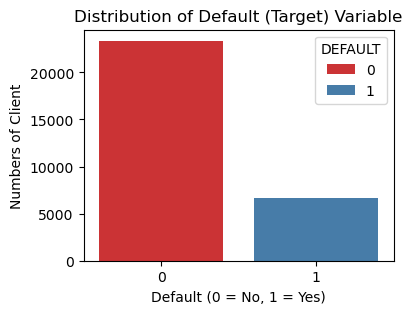

In [243]:
# Plot the target variable
plt.figure(figsize=(4, 3))
sns.countplot(x='DEFAULT', data=data, palette='Set1', hue='DEFAULT')
plt.title('Distribution of Default (Target) Variable')
plt.xlabel('Default (0 = No, 1 = Yes)')
plt.ylabel('Numbers of Client')
plt.show()


In [ ]:
#1- means to fail to make debt
#0 means sucessful to pay 

In [244]:
# Drop columns from index 1 to 2
data= data.drop(['ID', 'SEX', 'EDUCATION', 'MARRIAGE'], axis=1 )
data.head()

,LIMIT_BAL,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,0,689,0,0,0,0,1
1,120000,26,-1,2,0,0,0,2,2682,1725,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,34,0,0,0,0,0,0,29239,14027,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,37,0,0,0,0,0,0,46990,48233,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


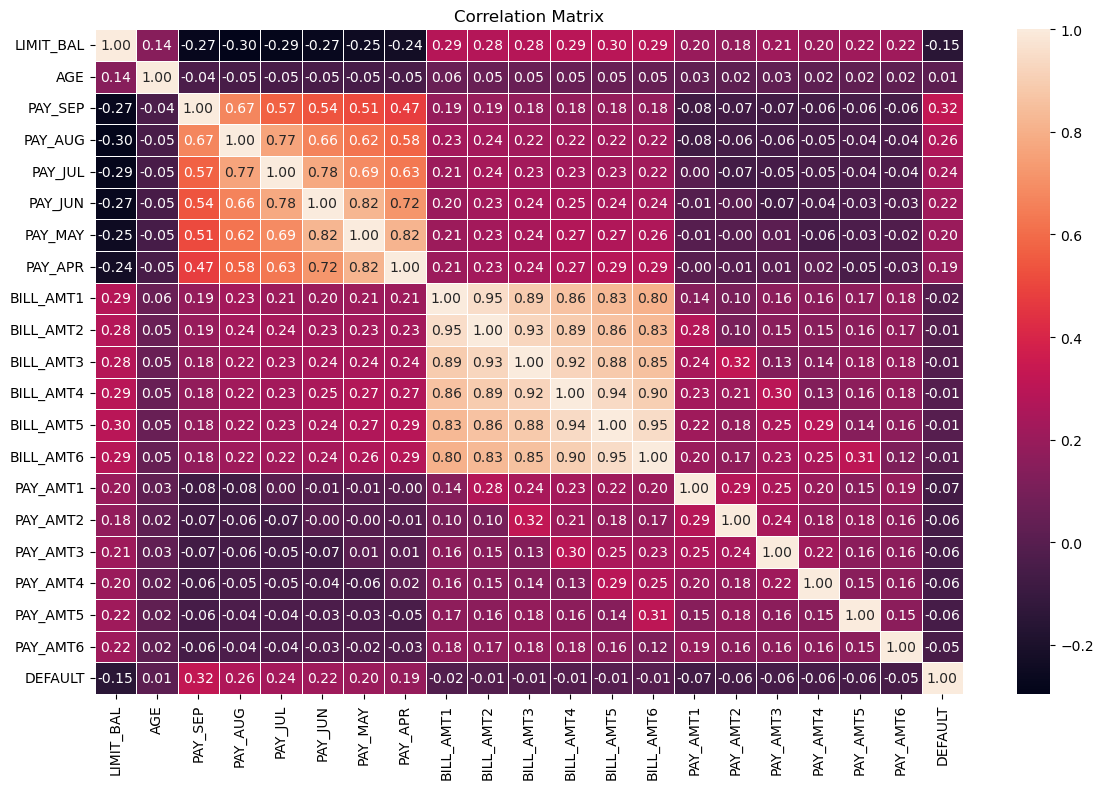

In [266]:
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [202]:
# Drop columns from index 1 to 2
data= data.drop(data.iloc[:, :3], axis=1)